<h1 style='font-size: 35px; color: crimson; font-family: Colonna MT; font-weight: 600; text-align: center'>Kruskal-Wallis H Test</h1>
<hr>


Used to compare differences between three or more independent groups when the dependent variable is either ordinal or continuous, but not normally distributed.


<h2 style='font-family: Colonna MT; font-weight: 600; font-size: 20px; text-align: left'>1.0. Import Required Libraries</h2>

In [47]:
from scipy.stats import kruskal
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import math

warnings.simplefilter("ignore")
pd.set_option('display.max_columns', 10)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
print("Libraries Loaded Successfully")

Libraries Loaded Successfully


<h2 style='font-family: Colonna MT; font-weight: 600; font-size: 20px; text-align: left'>2.0. Import and Preprocessing Dataset</h2>

In [3]:
filepath = 'Datasets/Fertilizer and Light Exposure Experiment Dataset.csv'
df = pd.read_csv(filepath)
df.sample(10)

,Fertilizer,Light Exposure,Plant Height (cm),Leaf Area (cm²),Chlorophyll Content (SPAD units),Root Length (cm),Biomass (g),Flower Count (number),Seed Yield (g),Stomatal Conductance (mmol/m²/s)
18,Synthetic,Full Shade,44.32,126.33,27.94,16.16,10.02,13.63,4.06,172.74
97,Control,Full Shade,37.74,128.16,32.17,22.09,7.73,13.01,4.46,148.69
115,Synthetic,Partial Shade,65.24,228.35,41.79,23.97,10.94,21.14,7.48,254.78
0,Control,Full Sun,58.56,185.74,46.52,24.32,11.99,19.54,6.69,242.41
76,Synthetic,Full Shade,47.88,119.00,23.99,18.79,8.19,13.08,4.38,191.44
25,Organic,Full Shade,51.21,127.18,36.35,19.70,11.41,12.84,4.55,157.57
86,Control,Partial Shade,63.26,174.56,36.44,23.86,10.30,19.83,4.94,242.41
59,Control,Full Sun,69.64,197.29,51.73,23.93,13.14,21.61,6.53,271.34
6,Control,Full Shade,40.22,163.65,36.07,18.14,9.25,14.05,4.21,195.13
32,Synthetic,Full Shade,38.05,130.50,29.89,17.45,7.53,11.85,4.31,162.93


<h2 style='font-family: Colonna MT; font-weight: 600; font-size: 20px; text-align: left'>3.0. Dataset Informations/ Overview</h2>

In [4]:
df.shape

(120, 10)

In [5]:
df.columns

Index(['Fertilizer', 'Light Exposure', 'Plant Height (cm)', 'Leaf Area (cm²)',
       'Chlorophyll Content (SPAD units)', 'Root Length (cm)', 'Biomass (g)',
       'Flower Count (number)', 'Seed Yield (g)',
       'Stomatal Conductance (mmol/m²/s)'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Fertilizer                        120 non-null    object 
 1   Light Exposure                    120 non-null    object 
 2   Plant Height (cm)                 120 non-null    float64
 3   Leaf Area (cm²)                   120 non-null    float64
 4   Chlorophyll Content (SPAD units)  120 non-null    float64
 5   Root Length (cm)                  120 non-null    float64
 6   Biomass (g)                       120 non-null    float64
 7   Flower Count (number)             120 non-null    float64
 8   Seed Yield (g)                    120 non-null    float64
 9   Stomatal Conductance (mmol/m²/s)  120 non-null    float64
dtypes: float64(8), object(2)
memory usage: 9.5+ KB


<h4 style='font-size: 18px; color: blue; font-family: Colonna MT; font-weight: 600'>3.1: Columns Summary</h4>

To begin the analysis, it is important to explore the dataset by summarizing its structure and key attributes. This involves examining the **data types (dtypes)** of each column to determine whether they contain numerical or categorical values, which helps in selecting appropriate analytical techniques. Additionally, checking the **number of unique values** in each column provides insight into the variability of the data, distinguishing between continuous and discrete features.  

Assessing **distinct values** allows for a better understanding of the diversity within each variable, while identifying **missing values** is essential to evaluate data completeness and potential gaps that may require handling. Lastly, reviewing the **count of non-null entries** ensures the dataset’s integrity and helps in deciding whether any preprocessing steps, such as data imputation or cleaning, are necessary. This exploratory step lays the foundation for effective analysis and meaningful insights.

In [7]:
def column_summary(df):
    summary_data = []
    
    for col_name in df.columns:
        col_dtype = df[col_name].dtype
        num_of_nulls = df[col_name].isnull().sum()
        num_of_non_nulls = df[col_name].notnull().sum()
        num_of_distinct_values = df[col_name].nunique()
        
        if num_of_distinct_values <= 10:
            distinct_values_counts = df[col_name].value_counts().to_dict()
        else:
            top_10_values_counts = df[col_name].value_counts().head(10).to_dict()
            distinct_values_counts = {k: v for k, v in sorted(top_10_values_counts.items(), key=lambda item: item[1], reverse=True)}

        summary_data.append({
            'col_name': col_name,
            'col_dtype': col_dtype,
            'num_of_nulls': num_of_nulls,
            'num_of_non_nulls': num_of_non_nulls,
            'num_of_distinct_values': num_of_distinct_values,
            'distinct_values_counts': distinct_values_counts
        })
    
    summary_df = pd.DataFrame(summary_data)
    return summary_df


summary_df = column_summary(df)
display(summary_df)

,col_name,col_dtype,num_of_nulls,num_of_non_nulls,num_of_distinct_values,distinct_values_counts
0,Fertilizer,object,0,120,3,"{'Control': 41, 'Synthetic': 40, 'Organic': 39}"
1,Light Exposure,object,0,120,3,"{'Full Shade': 44, 'Full Sun': 40, 'Partial Sh..."
2,Plant Height (cm),float64,0,120,120,"{58.56151388665052: 1, 46.696826238466286: 1, ..."
3,Leaf Area (cm²),float64,0,120,120,"{185.73856643236132: 1, 138.7980608962804: 1, ..."
4,Chlorophyll Content (SPAD units),float64,0,120,120,"{46.5196207922374: 1, 34.69363266870892: 1, 51..."
5,Root Length (cm),float64,0,120,120,"{24.31891050096943: 1, 17.6585349528435: 1, 33..."
6,Biomass (g),float64,0,120,120,"{11.994074041165357: 1, 8.667791843721698: 1, ..."
7,Flower Count (number),float64,0,120,120,"{19.53594616947752: 1, 15.366158832462084: 1, ..."
8,Seed Yield (g),float64,0,120,120,"{6.687959618540082: 1, 6.165373569255893: 1, 8..."
9,Stomatal Conductance (mmol/m²/s),float64,0,120,120,"{242.41380014645895: 1, 233.65862057163417: 1,..."


<h4 style='font-size: 18px; color: Blue; font-family: Colonna MT; font-weight: 600'>3.2: Checking Missing Values</h4>

Checking for missing values is a crucial step in data analysis to assess the completeness and reliability of the dataset. This involves identifying any columns with null or empty entries, which may affect the accuracy of statistical and machine learning models. Missing values can arise due to various reasons, such as incomplete survey responses or data collection errors.

In [8]:
def Missig_values_info(df):   
    isna_df = df.isna().sum().reset_index(name='Missing Values Counts')
    isna_df['Proportions (%)'] = isna_df['Missing Values Counts']/len(df)*100
    return isna_df
    
isna_df = Missig_values_info(df)
isna_df

,index,Missing Values Counts,Proportions (%)
0,Fertilizer,0,0.00
1,Light Exposure,0,0.00
2,Plant Height (cm),0,0.00
3,Leaf Area (cm²),0,0.00
4,Chlorophyll Content (SPAD units),0,0.00
5,Root Length (cm),0,0.00
6,Biomass (g),0,0.00
7,Flower Count (number),0,0.00
8,Seed Yield (g),0,0.00
9,Stomatal Conductance (mmol/m²/s),0,0.00


<h1 style='font-size: 25px; font-family: Colonna MT; font-weight: 600'>4.0: Exploration of Data Distribution (Visualizations)</h1>

To gain more intuitive insights, let's explore the data distribution through visualizations. Visual tools like histograms, box plots, and scatter plots help us easily identify patterns, trends, and outliers in the data. These visuals provide a clear representation of how data is spread across variables, allowing for quicker interpretation and a deeper understanding of the dataset’s structure and relationships.

In [42]:
def grids(num_variables):
    rows = math.ceil(num_variables / 3)
    cols = min(num_variables, 4)
    return rows, cols

def plot(df, variables, plot_type='histplot', group_col=None):
    num_variables = len(variables)
    rows, cols = grids(num_variables)

    fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 5))
    axes = axes.flatten() if num_variables > 1 else [axes]

    for idx, column in enumerate(variables):
        ax = axes[idx]
        if plot_type == 'histplot': sns.histplot(data=df, x=column, fill=True, hue=group_col, ax=ax, linewidth=0.5)
        elif plot_type == 'kdeplot': sns.kdeplot(data=df, x=column, fill=True,  hue=group_col, ax=ax, linewidth=1)
        elif plot_type == 'distplot': sns.distplot(df[column], color='blue', ax=ax)
        elif plot_type == 'boxplot': sns.boxplot(data=df, x=column, gap=0.1,  hue=group_col, ax=ax)
        elif plot_type == 'violinplot': sns.violinplot(data=df, x=column,  hue=group_col, ax=ax)
        else: raise ValueError(f"Unsupported plot type: {plot_type}")
        ax.set_title(f"{column} Distribution", fontsize=11, pad=10, fontweight='bold')
        if group_col : 
            ax.set_title(f"{column} by {group_col}", fontsize=11, pad=10, fontweight='bold')
        ax.set_xlabel(column, fontsize=11)
        ax.set_ylabel('Density' if 'kde' in plot_type else 'Counts', fontsize=11)
        ax.grid(linestyle='--', alpha=0.6)
    # Remove unused subplots
    for idx in range(num_variables, len(axes)):
        fig.delaxes(axes[idx])

    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()

<H4 style='font-size: 20px; color: blue; font-family: Candara; font-weight: 600'>4.1: Histogram (Frequency Distributions)</H4>

Let's start with a histogram to visualize the data distribution. A histogram will display the frequency of data points within specified intervals or bins, helping us understand the shape, spread, and central tendency of the data. By examining the histogram, we can quickly identify patterns such as skewness, the presence of outliers, or whether the data follows a normal distribution. This visualization is a great starting point for exploring the overall distribution of continuous variables.

In [43]:
Metrics = df.select_dtypes(include=[np.number]).columns
print(Metrics)

Index(['Plant Height (cm)', 'Leaf Area (cm²)',
       'Chlorophyll Content (SPAD units)', 'Root Length (cm)', 'Biomass (g)',
       'Flower Count (number)', 'Seed Yield (g)',
       'Stomatal Conductance (mmol/m²/s)'],
      dtype='object')


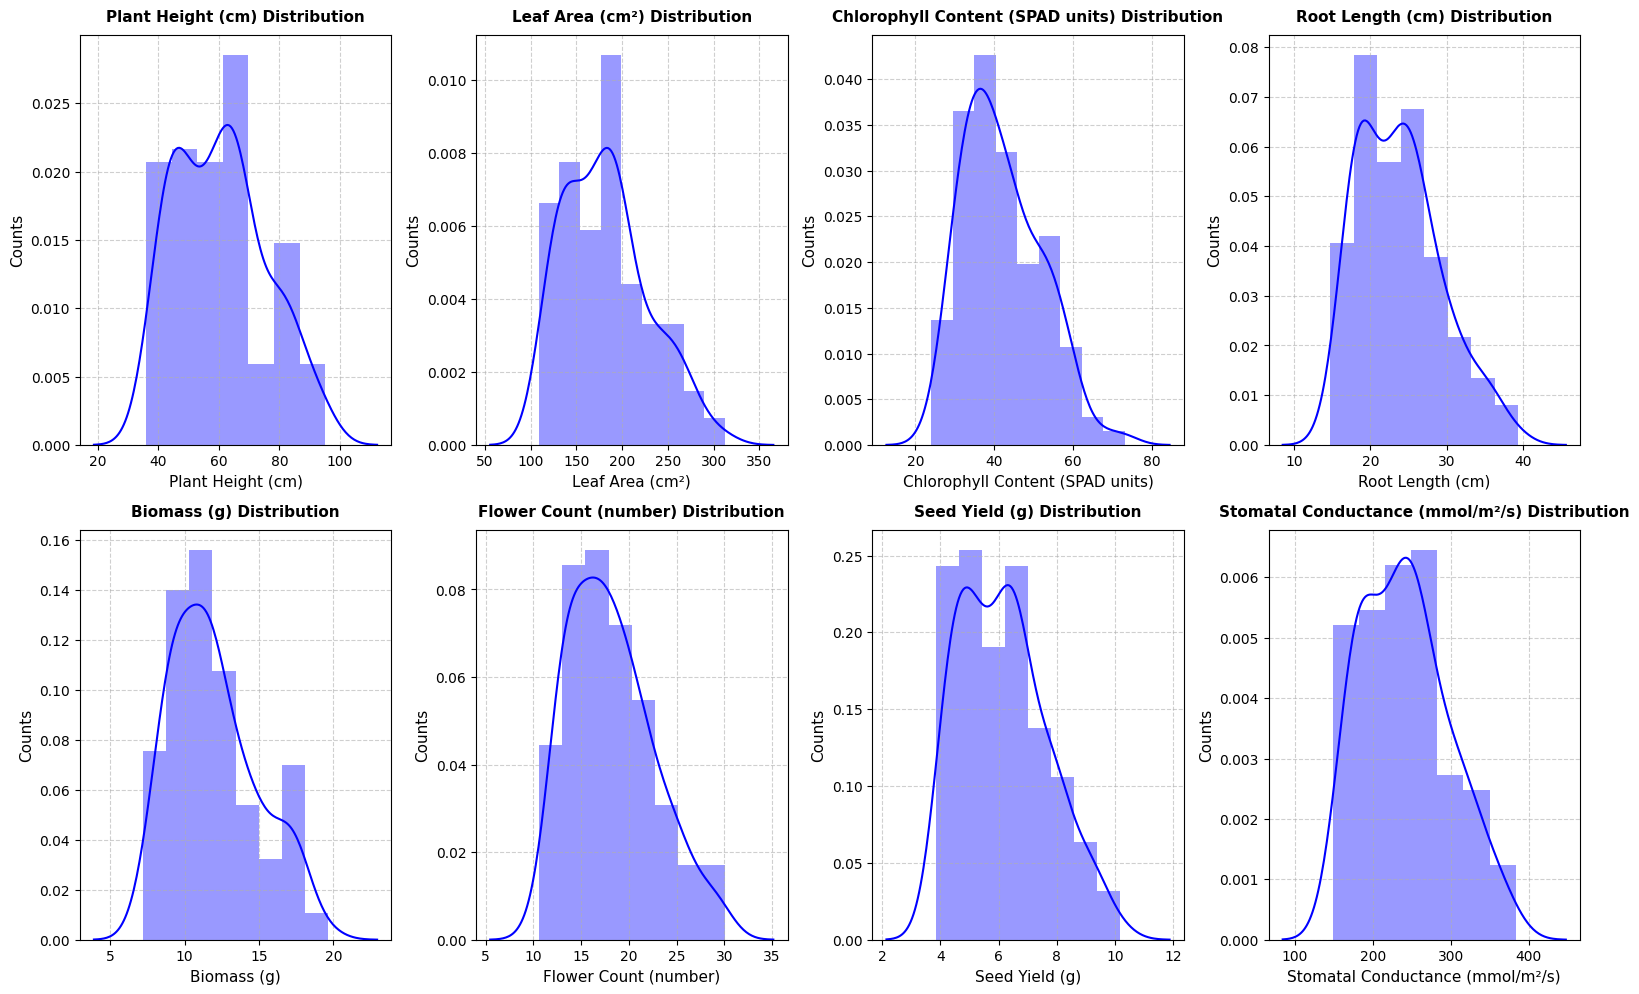

In [44]:
variables = df.select_dtypes(include=[np.number]).columns
plot(df, variables, plot_type='distplot')

<h4 style='font-size: 20px; color: blue; font-family: Candara; font-weight: 600'>4.2. Kernel Density Estimate (KDE) Plot</h4>

Let's use a Kernel Density Estimate (KDE) plot to get a smoother distribution of the data. The KDE plot provides a continuous, smoothed version of the data distribution, which helps us better understand the underlying patterns and density of the data. Unlike histograms, which bin data into discrete intervals, KDE estimates the probability density function, giving us a clearer view of the distribution, identifying peaks, and allowing for easier comparison between variables or groups. This plot is especially useful for visualizing the shape of the data and detecting any subtle trends or differences that may not be as apparent in other visualizations.

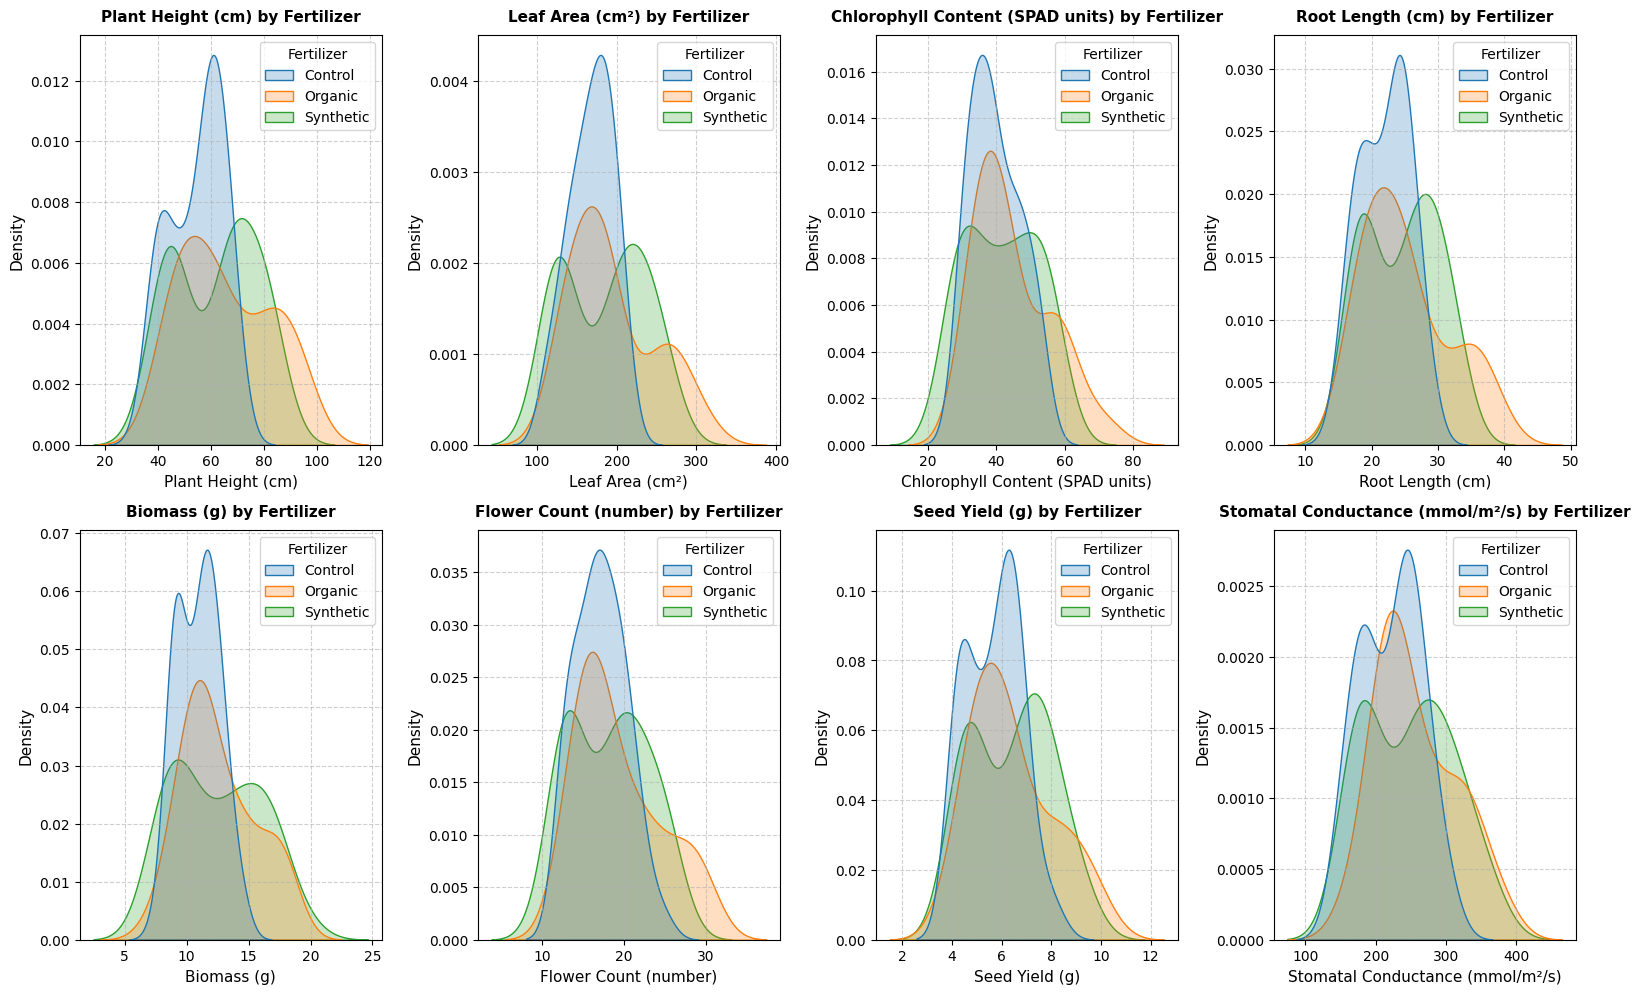

In [45]:
variables = df.select_dtypes(include=[np.number]).columns
plot(df, variables, plot_type='kdeplot', group_col='Fertilizer')

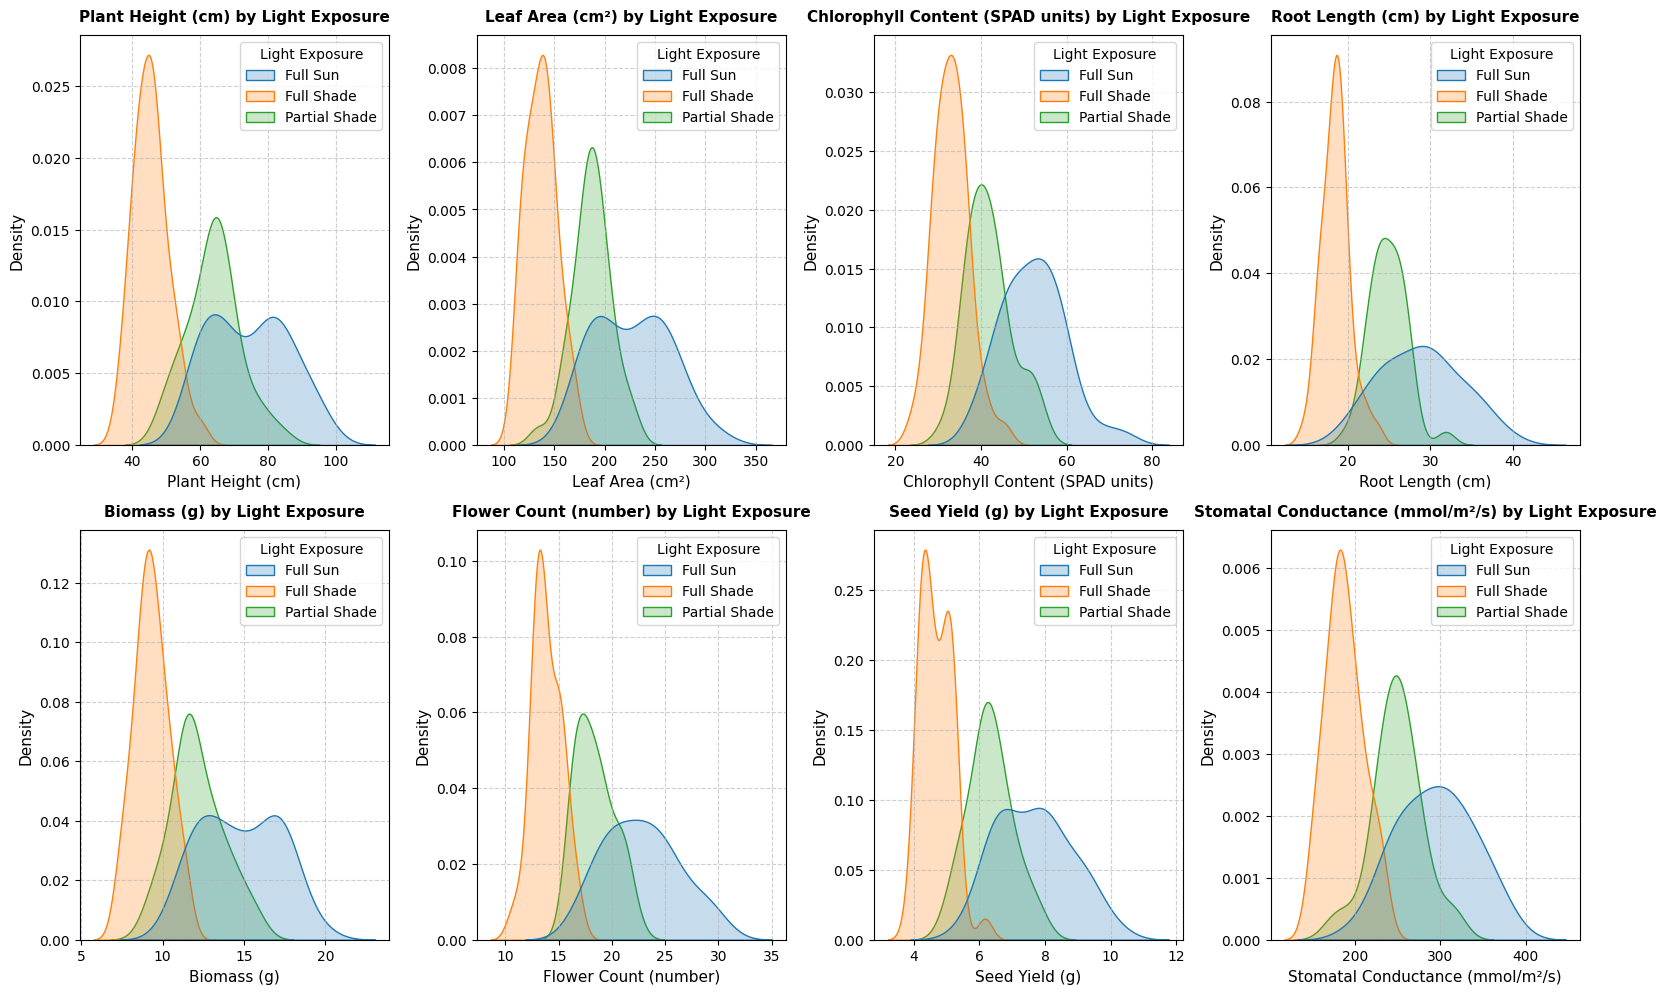

In [46]:
variables = df.select_dtypes(include=[np.number]).columns
plot(df, variables, plot_type='kdeplot', group_col='Light Exposure')

<h1 style='font-size: 25px; font-family: Colonna MT; font-weight: 600'>5.0: Mean Comparisons Test (Kruskal-Wallis test)</h1>

<h4 style='font-size: 20px; color: blue; font-family: Colonna MT; font-weight: 600'>5.1: Kruskal-Wallis test (Single Factor)</h4>

The **Kruskal-Wallis Test** is a non-parametric alternative to One-Way ANOVA and is used when the assumptions of normality and homogeneity of variance are not met. It compares the medians of three or more independent groups and tests whether they come from the same distribution. Like ANOVA, the Kruskal-Wallis test assesses whether there are significant differences between the groups, but it does not assume a normal distribution, making it more robust in situations where data may not meet the assumptions of ANOVA. If the p-value is less than the significance threshold, it indicates that at least one of the groups is significantly different from the others.

In [14]:
def Kruskal_Wallis_test(data, numerical_columns, group_column):
    results = []
    for response_column in numerical_columns:
        groups = [data[response_column][data[group_column] == group] for group in data[group_column].unique()]
        stat, p_value = kruskal(*groups)
        interpretation = "Significant difference" if p_value < 0.05 else "No significant difference"
        results.append({
            "Variable": response_column,
            "Source of Variation": group_column,
            "H-Statistic": stat,
            "p-Value": p_value,
            "Interpretation": interpretation
        })
    
    results_df = pd.DataFrame(results)
    return results_df

group_column = "Fertilizer"
numerical_columns = df.select_dtypes(include=["float64", "int64"]).columns
kruskal_results_df = Kruskal_Wallis_test(df, numerical_columns, group_column)
kruskal_results_df

,Variable,Source of Variation,H-Statistic,p-Value,Interpretation
0,Plant Height (cm),Fertilizer,10.12,0.01,Significant difference
1,Leaf Area (cm²),Fertilizer,4.22,0.12,No significant difference
2,Chlorophyll Content (SPAD units),Fertilizer,3.65,0.16,No significant difference
3,Root Length (cm),Fertilizer,5.81,0.05,No significant difference
4,Biomass (g),Fertilizer,6.04,0.05,Significant difference
5,Flower Count (number),Fertilizer,2.76,0.25,No significant difference
6,Seed Yield (g),Fertilizer,5.47,0.06,No significant difference
7,Stomatal Conductance (mmol/m²/s),Fertilizer,7.39,0.02,Significant difference


<h4 style='font-size: 20px; color: blue; font-family: Colonna MT; font-weight: 600'>5.3: Kruskal-Wallis test (Interaction Effects)</h4>

Perform non-parametric two-way analysis using Kruskal-Wallis tests.

In [18]:
def kruskal_walis_test(data, Numerical_columns, factor1, factor2):
    results = []
    for response_column in Numerical_columns:
        # Test for Factor1
        groups_factor1 = [data[response_column][data[factor1] == group] for group in data[factor1].unique()]
        stat_factor1, p_value_factor1 = kruskal(*groups_factor1)
        interpretation_factor1 = "Significant difference" if p_value_factor1 < 0.05 else "No significant difference"
        
        results.append({
            "Variable": response_column,
            "Source": factor1,
            "H-Statistic": stat_factor1,
            "p-Value": p_value_factor1,
            "Interpretation": interpretation_factor1
        })
        

        groups_factor2 = [data[response_column][data[factor2] == group] for group in data[factor2].unique()]
        stat_factor2, p_value_factor2 = kruskal(*groups_factor2)
        interpretation_factor2 = "Significant difference" if p_value_factor2 < 0.05 else "No significant difference"
        
        results.append({
            "Variable": response_column,
            "Source": factor2,
            "H-Statistic": stat_factor2,
            "p-Value": p_value_factor2,
            "Interpretation": interpretation_factor2
        })
        
        # Test for Interaction (Factor1 x Factor2)
        data['Interaction'] = data[factor1].astype(str) + " x " + data[factor2].astype(str)
        groups_interaction = [data[response_column][data['Interaction'] == group] for group in data['Interaction'].unique()]
        stat_interaction, p_value_interaction = kruskal(*groups_interaction)
        interpretation_interaction = "Significant difference" if p_value_interaction < 0.05 else "No significant difference"
        
        results.append({
            "Variable": response_column,
            "Source": f"{factor1} x {factor2}",
            "H-Statistic": stat_interaction,
            "p-Value": p_value_interaction,
            "Interpretation": interpretation_interaction
        })
    

    results_df = pd.DataFrame(results)
    return results_df

factor1 = "Fertilizer"
factor2 = "Light Exposure"
Numerical_columns = df.select_dtypes(include=["float64", "int64"]).columns
nonparametric_results_df = kruskal_walis_test(df, Numerical_columns, factor1, factor2)
pd.set_option("display.float_format", "{:.4f}".format)
nonparametric_results_df

,Variable,Source,H-Statistic,p-Value,Interpretation
0,Plant Height (cm),Fertilizer,10.1237,0.0063,Significant difference
1,Plant Height (cm),Light Exposure,85.2770,0.0000,Significant difference
2,Plant Height (cm),Fertilizer x Light Exposure,102.1491,0.0000,Significant difference
3,Leaf Area (cm²),Fertilizer,4.2229,0.1211,No significant difference
4,Leaf Area (cm²),Light Exposure,88.0000,0.0000,Significant difference
5,Leaf Area (cm²),Fertilizer x Light Exposure,102.4782,0.0000,Significant difference
6,Chlorophyll Content (SPAD units),Fertilizer,3.6458,0.1616,No significant difference
7,Chlorophyll Content (SPAD units),Light Exposure,85.7035,0.0000,Significant difference
8,Chlorophyll Content (SPAD units),Fertilizer x Light Exposure,96.5751,0.0000,Significant difference
9,Root Length (cm),Fertilizer,5.8076,0.0548,No significant difference


---

This analysis was performed by **Jabulente**, a passionate and dedicated data scientist with a strong commitment to using data to drive meaningful insights and solutions. For inquiries, collaborations, or further discussions, please feel free to reach out via.  

---

<div align="center">  
    
[![GitHub](https://img.shields.io/badge/GitHub-Jabulente-black?logo=github)](https://github.com/Jabulente)  [![LinkedIn](https://img.shields.io/badge/LinkedIn-Jabulente-blue?logo=linkedin)](https://linkedin.com/in/jabulente-208019349)  [![X (Twitter)](https://img.shields.io/badge/X-@Jabulente-black?logo=x)](https://x.com/Jabulente)  [![Instagram](https://img.shields.io/badge/Instagram-@Jabulente-purple?logo=instagram)](https://instagram.com/Jabulente)  [![Threads](https://img.shields.io/badge/Threads-@Jabulente-black?logo=threads)](https://threads.net/@Jabulente)  [![TikTok](https://img.shields.io/badge/TikTok-@Jabulente-teal?logo=tiktok)](https://tiktok.com/@Jabulente)  [![Email](https://img.shields.io/badge/Email-jabulente@hotmail.com-red?logo=gmail)](mailto:Jabulente@hotmail.com)  

</div>

<h1 style='font-size: 55px; color: Tomato; font-family: Colonna MT; font-weight: 700; text-align: center'>THE END</h1>